<a href="https://colab.research.google.com/github/lanqingz/geog600/blob/main/606_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
%matplotlib inline

In [2]:
#find directors who make the worset movie (rating and metascore) overall in 2006 to 2016
#find directors who make the worst movie (rating and metascore) but still have a good revenue

In [166]:
df = pd.read_csv('https://github.com/LearnDataSci/articles/raw/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv')
df.head(-1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [4]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [5]:
df.groupby('Director')['Revenue (Millions)'].mean()
director_revenue = df.groupby('Director')['Revenue (Millions)'].mean()
director_revenue
director_revenue.dropna()
director_revenue_noNAs = director_revenue.dropna()
director_revenue_noNAs.sort_values()

Director
Andy Goddard         0.000
Phillip Guzman       0.010
Robin Swicord        0.010
Patricia Rozema      0.010
So Yong Kim          0.010
                    ...   
Gary Ross          408.000
Lee Unkrich        414.980
Joss Whedon        541.135
Colin Trevorrow    652.180
James Cameron      760.510
Name: Revenue (Millions), Length: 540, dtype: float64

In [6]:
director_rating=df.groupby('Director')['Rating'].mean()
director_rating
director_rating.dropna()
director_rating_noNAs = director_rating.dropna()
director_rating_noNAs.sort_values()

Director
Jason Friedberg      1.90
James Wong           2.70
Shawn Burkett        2.70
Jonathan Holbrook    3.20
Femi Oyeniran        3.50
                     ... 
Aamir Khan           8.50
Olivier Nakache      8.60
Makoto Shinkai       8.60
Christopher Nolan    8.68
Nitesh Tiwari        8.80
Name: Rating, Length: 644, dtype: float64

In [7]:
df.groupby('Director')['Metascore'].mean()
director_metascore = df.groupby('Director')['Metascore'].mean()
director_metascore.dropna()
director_metascore_noNAs = director_metascore.dropna()
director_metascore_noNAs.sort_values()

Director
Jason Friedberg     15.0
Dan Mazer           18.0
Garry Marshall      18.0
Steven Brill        22.0
Scot Armstrong      22.0
                    ... 
Michael Goi         94.0
Kathryn Bigelow     94.5
Todd Haynes         95.0
Kenneth Lonergan    96.0
Barry Jenkins       99.0
Name: Metascore, Length: 607, dtype: float64

In [8]:
director_rating_noNAs.nsmallest(10, keep='all')
Worst_director=director_rating.nsmallest(10, keep='all')
Worst_director

Director
Jason Friedberg       1.9
James Wong            2.7
Shawn Burkett         2.7
Jonathan Holbrook     3.2
Femi Oyeniran         3.5
Micheal Bafaro        3.5
Jeffrey G. Hunt       3.7
Rolfe Kanefsky        3.9
Joey Curtis           4.0
Sam Taylor-Johnson    4.1
Name: Rating, dtype: float64

In [9]:
data=[['Jason Friedberg',1.9],['James Wong',2.7],['Shawn Burkett',2.7],['Jonathan Holbrook',3.2],['Femi Oyeniran',3.5],['Micheal Bafaro',3.5],['Jeffrey G. Hunt',3.7],['Rolfe Kanefsky',3.9],['Joey Curtis',4.0],['Sam Taylor-Johnson',4.1]]
df2=pd.DataFrame(data, columns=['Director name','Rating'])
df2

,Director name,Rating
0,Jason Friedberg,1.9
1,James Wong,2.7
2,Shawn Burkett,2.7
3,Jonathan Holbrook,3.2
4,Femi Oyeniran,3.5
5,Micheal Bafaro,3.5
6,Jeffrey G. Hunt,3.7
7,Rolfe Kanefsky,3.9
8,Joey Curtis,4.0
9,Sam Taylor-Johnson,4.1


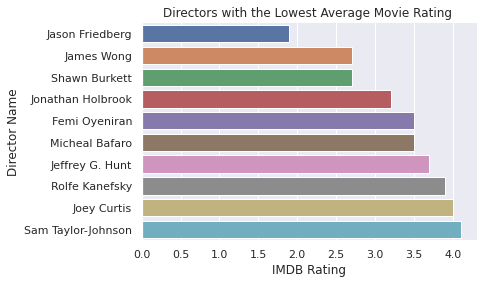

In [10]:
sns.set(style="darkgrid", context="notebook")
sns.barplot(data=df2,x='Rating',y='Director name')
plt.title('Directors with the Lowest Average Movie Rating ')
plt.xlabel('IMDB Rating')
plt.ylabel('Director Name')
sns.despine()
#plt.savefig('figure_1.png', dpi=600,bbox_inches='tight')

In [11]:
# ax = plt.axes(facecolor='#E6E6E6')
# ax.set_axisbelow(True)

# plt.grid(color='w', linestyle='solid')

# for spine in ax.spines.values():
#     spine.set_visible(False)
    
# ax.xaxis.tick_bottom()
# ax.yaxis.tick_left()

# ax.tick_params(colors='gray', direction='out')
# for tick in ax.get_xticklabels():
#     tick.set_color('gray')
# for tick in ax.get_yticklabels():
#     tick.set_color('gray')
# df['Year'].hist()
# plt.xlabel('Year')
# plt.ylabel('Number of Movies')

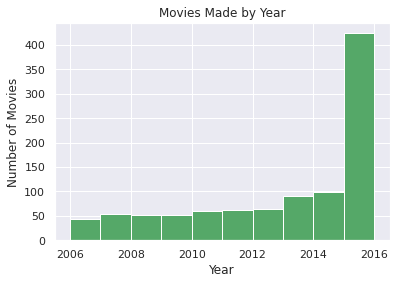

In [164]:
# with plt.style.context('fivethirtyeight'):
df['Year'].hist(color="g")
plt.title('Movies Made by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
#plt.savefig('figure_2.png', dpi=600,bbox_inches='tight')

In [ ]:
# df['Revenue (Millions)'].plot(kind='hist',bins = [0.01, 0.1, 1, 10, 100, 1000])
# plt.xscale('log')

In [ ]:
# histplot=sns.histplot(df['Revenue (Millions)'],kde=True)
# histplot.set_xlim(0,450)
# plt.axvline(x=48, color='red', linestyle='--')


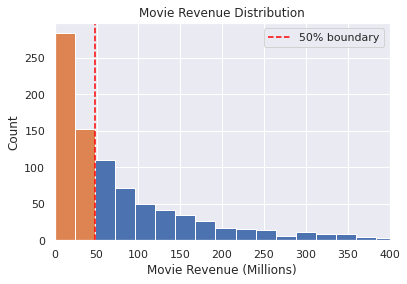

In [172]:
Top50 = df[(df['Revenue (Millions)'] >= 48)]
Bottom50 = df[(df['Revenue (Millions)'] < 48)]

binwidth=24
plt.hist(Top50['Revenue (Millions)'], bins=np.arange(min(Top50['Revenue (Millions)']), max(Top50['Revenue (Millions)']) + binwidth, binwidth))
plt.hist(Bottom50['Revenue (Millions)'], bins=np.arange(min(Bottom50['Revenue (Millions)']), max(Bottom50['Revenue (Millions)']) + binwidth, binwidth))
plt.xlim(0,400)
plt.axvline(x=48,color='red', linestyle="--",label='50% boundary')
plt.xlabel('Movie Revenue (Millions)')
plt.ylabel('Count')
plt.legend()
plt.title('Movie Revenue Distribution')
#plt.savefig('figure_6.png', dpi=600,bbox_inches='tight')

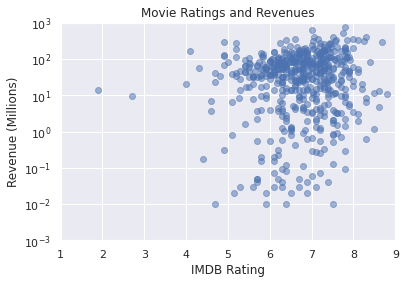

In [13]:
#This graph plots the avergae rating for movies by each director against their average revenue made. 
#Lowest rating outlier - Diaster Movie by Jason Freidberg, Second worst movie - Dragonball Eveluation by James Wong
plt.scatter(df.groupby('Director')['Rating'].mean(), df.groupby('Director')['Revenue (Millions)'].mean(),c='b',alpha=0.5)
plt.title('Movie Ratings and Revenues')
plt.xlabel('IMDB Rating')
plt.ylabel('Revenue (Millions)')
plt.xlim(1,9)
plt.ylim(0.001, 1000)
plt.yscale('log')
#plt.savefig('figure_3.png', dpi=600,bbox_inches='tight')

In [14]:
Revenue1=df.groupby('Title')['Rating'].mean()
RevenueDropna=Revenue1.dropna()
RevenueDropna.sort_values()

Title
Disaster Movie             1.9
Dragonball Evolution       2.7
Don't Fuck in the Woods    2.7
Tall Men                   3.2
Wrecker                    3.5
                          ... 
Kimi no na wa              8.6
Interstellar               8.6
Dangal                     8.8
Inception                  8.8
The Dark Knight            9.0
Name: Rating, Length: 999, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


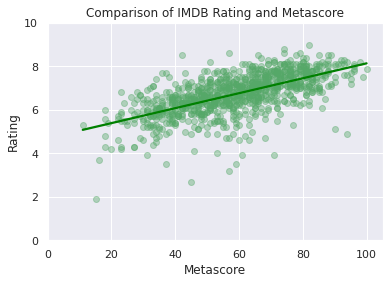

In [15]:
#This graph shows a clear linear relationsgip between movie Metascore and the Rating
x=['Metascore']
y=['Rating']
plt.scatter(df['Metascore'],df['Rating'],color='g',alpha=0.4)
plt.xlabel('Metascore')
plt.ylabel('IMDB Rating')
plt.title('Comparison of IMDB Rating and Metascore');
plt.ylim([0,10])
plt.xlim([0,105])
sns.regplot(df['Metascore'],df['Rating'],scatter = False, ci = 0, 
    fit_reg = True, color = 'green')
#plt.savefig('figure_4.png', dpi=600,bbox_inches='tight')

In [16]:
#Data summary table - top 5 directors who made the most money from thier movies
#find how many movies they made in total
Revenue_sum=df.groupby('Director')['Revenue (Millions)'].sum()
Revenue_sum.sort_values()

Director
Greg Kwedar             0.00
Chris Stokes            0.00
John Butler             0.00
Chris McCoy             0.00
Jim Sheridan            0.00
                      ...   
Francis Lawrence     1299.81
Michael Bay          1421.32
Christopher Nolan    1515.09
David Yates          1630.51
J.J. Abrams          1683.45
Name: Revenue (Millions), Length: 644, dtype: float64

In [171]:
data=[['Director Name','Total Revenue Made (Millions)','Number of Movies','Revenue per Movie'],['J.J. Abrams',1683.45,5,336.69],['David Yates',1630.51,6,271.75],['Christopher Nolan',1515.09,5,303.02],['Michael Bay',1421.32,6,236.89],['Francis Lawrence',1299.81,4,324.95]]
print(tabulate(data,headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤═════════════════════════════════╤════════════════════╤═════════════════════╕
│ Director Name     │   Total Revenue Made (Millions) │   Number of Movies │   Revenue per Movie │
╞═══════════════════╪═════════════════════════════════╪════════════════════╪═════════════════════╡
│ J.J. Abrams       │                         1683.45 │                  5 │              336.69 │
├───────────────────┼─────────────────────────────────┼────────────────────┼─────────────────────┤
│ David Yates       │                         1630.51 │                  6 │              271.75 │
├───────────────────┼─────────────────────────────────┼────────────────────┼─────────────────────┤
│ Christopher Nolan │                         1515.09 │                  5 │              303.02 │
├───────────────────┼─────────────────────────────────┼────────────────────┼─────────────────────┤
│ Michael Bay       │                         1421.32 │                  6 │              236.89 │
├─────────

In [18]:
df.groupby('Year')['Rating'].mean()

Year
2006    7.125000
2007    7.133962
2008    6.784615
2009    6.960784
2010    6.826667
2011    6.838095
2012    6.925000
2013    6.812088
2014    6.837755
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

In [19]:
df.groupby('Year')['Revenue (Millions)'].mean()

Year
2006     86.296667
2007     87.882245
2008     99.082745
2009    112.601277
2010    105.081579
2011     87.612258
2012    107.973281
2013     87.121818
2014     85.078723
2015     78.355044
2016     54.690976
Name: Revenue (Millions), dtype: float64

Text(0.5, 1.0, 'Average Movie Rating and Revenue from 2006 to 2016')

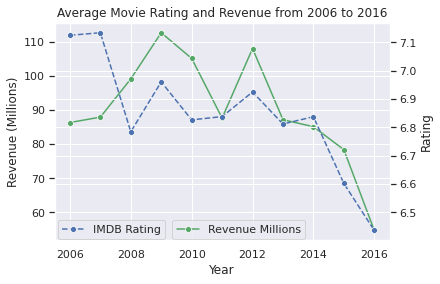

In [20]:
sns.set(style="darkgrid", context="notebook")
sns.lineplot(data=df.groupby('Year')['Revenue (Millions)'].mean(), color="g", legend='brief', label='Revenue Millions', marker='o')
plt.legend(bbox_to_anchor=(0.55, 0.05), loc='center')
ax2 = plt.twinx()
sns.lineplot(data=df.groupby('Year')['Rating'].mean(), color="b", ax=ax2, legend='brief', label='IMDB Rating', linestyle='--',marker='o')
plt.legend(bbox_to_anchor=(0.17, 0.05), loc='center')
plt.title('Average Movie Rating and Revenue from 2006 to 2016')
#plt.savefig('figure_5.png', dpi=600,bbox_inches='tight')